In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,CuDNNLSTM
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
MOD=256
def KSA(key):
    key_length = len(key)
    S = list(range(MOD))
    j = 0
    for i in range(MOD):
        j = (j + S[i] + key[i % key_length]) % MOD
        S[i], S[j] = S[j], S[i]  # swap values
    return S


def PRGA(S):
    i = 0
    j = 0
    while True:
        i = (i + 1) % MOD
        j = (j + S[i]) % MOD

        S[i], S[j] = S[j], S[i]  # swap values
        K = S[(S[i] + S[j]) % MOD]
        yield K


def get_keystream(key):
    S = KSA(key)
    return PRGA(S)

key='this_is_a_key'
key=[ord(x) for x in key]
generator=get_keystream(key)#generator object generates keys when next(generator) is called



bin_str=''                                                                            
for i in range(40000):
    bin_str+=format(next(generator),'08b') #8 bits and remove 0b from starting
print(bin_str)

0011110000101010101000101001000111111110000110100000010101001111011111011111000001010100111101000001110110101000011001110000011101001111000010101011000010001011001110110010111011101111001110111100000010000100011101110110011111100111110110011111101100000101110100010100000000111111111111001001001100100000111110000110011001100001100111010110110100100000010010100111110000110110110010100100000010100010000011000011110010010011101011000110100011001001001101001001110100010110100010110111011001000000111010100000000100100000111011100101101001101011111011001101101010100010011000001110001111001010010011101111110011100101011000011010111111011011000110001111101011000101110010011010011110100001001011011100110011011100011000011111110000100110110000100001001101110101110101111010001000101100010111100000100101110000101111110001000011010010000101111010010011111000100001011000011010100101011101011111100010011001100110001010010010110011010110011101100101111111100110001101111110110110100011000011001101001101

In [0]:
#data='Newspapers are important sources of news and information. They carry news and views on a great variety of topics that includes politics, economy, business, society, sports, science, spirituality, environment, health and entertainment. Newspapers not only carry important national and international news, they also feature useful local news, views and information. Newspapers have many pages. They also have magazine sections. These are usually devoted to a particular theme. There are magazine sections that deal exclusively with literature, films, travel or the arts. Newspapers also cover reviews and stories of recent releases of books, films and plays. Often these reviews influence the people in buying a book or watching a film or a play at a theatre.New products and services launched in the market are also advertised through the pages of the newspapers. Important announcements and messages are also made known to the public through the newspapers. Advertisements are also brought out in newspapers for jobs available as also for houses available on sale or for hire. Various products such as vehicles and electronic goods available for second hand purchase are also advertised through the pages of newspapers.Local weather reports are also published in newspapers. Information pertaining to travel to various destinations by train, bus and flight are also available in newspapers.Newspapers are a must-read to keep ourselves abreast of what is happening around us. They carry authentic and wholly true news and information. Journalists work hard to collect factual and error-free information, news and data. Besides correspondents and reporters who work with newspaper publishers, various experts and well-known personalities also write articles for newspapers. These articles influence public opinion.Editors and their editorial teams edit stories and articles before they are published in the newspapers. Newspapers also carry editorials that convey the views of their editors. Letters to the editors are also published in newspapers.Newspapers are printed on newsprint, a very thin paper. Special sections of the newspaper are also printed on glossy paper. Newspapers are attractively designed and are printed in colour. They are low-priced and are thus very accessible to the people.Newspapers are published in the broadsheet or tabloid size. While there are dailies that are published every day, weeklies are those brought out once a week. While there are dailies made available each morning, there are also eveningers that are sold in the evenings carrying the news and views of the entire day.'
#word_list=data.split()
#bin_str=''
#for word in word_list:    
#    bin_str+=''.join(format(ord(x),'b') for x in word) #convert word to binary format
#     print(bin_str)

In [0]:
binary_inputs=hex(int(bin_str,2) )
binary_inputs=binary_inputs[2:-1]
print(binary_inputs)

3c2aa291fe1a054f7df054f41da867074f0ab08b3b2eef3bc0847767e7d9fb05d1403ffc9320f866619d6d204a7c36ca40a20c3c93ac68c9349d168b7640ea0120ee5a6becdaa260e3ca4efce561afdb18fac5c9a7a12dccdc61fc26c21375d7a22c5e0970bf10d217a4f88586a575f89998a4b359d97f98dfb68c334d28ff29d6313837cc76cb6c1a94d49d9e19bd3277cddab5efff4266721f271b12faf7351024f8ce26d01b61a7498388ffc1cc191545c991c0fa6bbf706aaae5378bbf58c3448e534253d6f74f0d5bf0f568ec3c3e1fe09fe9c6501e4873734a84bd3b78a53e7418e53f1e663d50af43b4429a062dd2f4e79af6e070475dbe3492da2cb0385438192888fcad354878bc285e4dc4b400ab64903ce1b297e94c43257a61ba31e06bf264effa9250e5561e501d50efde554092bd1024fd916239f247902db54b3b4fbaf2f81f4846758b3b7e95d064beb6689ea3152b789947b4bc424701bb3ac89abc14e7f1689b1930ce5266a69b5500403a1cd52162fda0003290302e52c10a2f101b4fe1433eb579806ef285a67012e588a7fd1f78ca9214da2a539b9b69ac31778fb72099f7cedaa7faba3864a2dd90c5215f8a3a9313dff719c5e5e406b13dab083979630f4dbbed18bcc649cea9e190c6bd7bd624281e0bcdfe9d5e311204d4fd303e47836e0c1b38116334890250ce

In [0]:
X=[]
l=len(binary_inputs)-20 
for i in range(0,l,8):
    X.append(binary_inputs[i:i+8])

In [0]:
NUM_ROUNDS = {
    # (block_size, key_size): num_rounds
    (32, 64): 32,
    (48, 96): 36,
    (64, 128): 44,
}

In [0]:
def get_sequence(num_rounds):
    if num_rounds < 40:
        states = [1] * 5
#         print("States: ",states)
    else:
        states = [1] * 6

    for i in range(num_rounds - 5):
        if num_rounds < 40:
#             print("States of- ",i)
            feedback = states[i + 2] ^ states[i]
#             print("fb is: ",feedback)
        else:
            feedback = states[i + 1] ^ states[i]
#             priint("oh!")
        states.append(feedback)

    return tuple(states)

In [0]:
#32, 64, 0x1918111009080100
class Simeck:
    def __init__(self, block_size, key_size, master_key):
        assert (block_size, key_size) in NUM_ROUNDS
        assert 0 <= master_key < (1 << key_size)###-------------------------------------------------------
        self._block_size = block_size
        self._key_size = key_size
        self._word_size = block_size // 2
        self._num_rounds = NUM_ROUNDS[(block_size, key_size)]
#         print("Rounds are: " ,self._num_rounds)
        self._sequence = get_sequence(self._num_rounds)
#         print("seq",self._sequence)
        self._modulus = 1 << self._word_size #modulus= 2^16= 65536
#         print(self._modulus)
        self.change_key(master_key)

    def _LROT(self, x, r):
        assert 0 <= x < self._modulus
        res = (x << r) % self._modulus
        res |= x >> (self._word_size - r)
        return res

    def _round(self, round_key, left, right):
        assert 0 <= round_key < self._modulus
        assert 0 <= left < self._modulus
        assert 0 <= right < self._modulus
        temp = left
        left = right ^ (left & self._LROT(left, 5)) ^ self._LROT(left, 1) ^ round_key
        right = temp
#         print (hex(round_key))
#         print(hex(left), "----", hex(right))
        return left, right

    def change_key(self, master_key):
        print("key size: ",self._key_size)
        assert 0 <= master_key < (1 << self._key_size)
        states = []
        for i in range(self._key_size // self._word_size):
            states.append(master_key % self._modulus) #-----------------------------------[a,b,c,d?]
#             print("states2:",states)
            master_key >>= self._word_size
#             print("mk:",master_key)

        constant = self._modulus - 4
        round_keys = []
        for i in range(self._num_rounds):
            round_keys.append(states[0]) ##########
#             print("rk",round_keys)
            left, right = states[1], states[0]##############
#             print("left1: ",left)
#             print("right1: ",right)
            left, right = self._round(constant ^ self._sequence[i],############
                                      left, right)
#             print("left2: ",left)
#             print("right2: ",right)
#             print("s before: ",states)
#             print("left o/p: ")
            states.append(left) #############
#             print(states) 
            states.pop(0)  #############
            states[0] = right           #############                                          
        self.__round_keys = tuple(round_keys)

    def encrypt(self, plaintext):
        assert 0 <= plaintext < (1 << self._block_size)
        left = plaintext >> self._word_size
        right = plaintext % self._modulus

        for idx in range(self._num_rounds):
            left, right = self._round(self.__round_keys[idx],
                                      left, right)

        ciphertext = (left << self._word_size) | right
        return ciphertext


In [0]:
key64 = 0x1918111009080100
simeck32 = Simeck(32, 64, key64)
Y=[]
for x in X:
    ct1=simeck32.encrypt(int(x,16))
    Y.append(ct1)

key size:  64


In [0]:
print("x",X)
print("y",Y)


x ['3c2aa291', 'fe1a054f', '7df054f4', '1da86707', '4f0ab08b', '3b2eef3b', 'c0847767', 'e7d9fb05', 'd1403ffc', '9320f866', '619d6d20', '4a7c36ca', '40a20c3c', '93ac68c9', '349d168b', '7640ea01', '20ee5a6b', 'ecdaa260', 'e3ca4efc', 'e561afdb', '18fac5c9', 'a7a12dcc', 'dc61fc26', 'c21375d7', 'a22c5e09', '70bf10d2', '17a4f885', '86a575f8', '9998a4b3', '59d97f98', 'dfb68c33', '4d28ff29', 'd6313837', 'cc76cb6c', '1a94d49d', '9e19bd32', '77cddab5', 'efff4266', '721f271b', '12faf735', '1024f8ce', '26d01b61', 'a7498388', 'ffc1cc19', '1545c991', 'c0fa6bbf', '706aaae5', '378bbf58', 'c3448e53', '4253d6f7', '4f0d5bf0', 'f568ec3c', '3e1fe09f', 'e9c6501e', '4873734a', '84bd3b78', 'a53e7418', 'e53f1e66', '3d50af43', 'b4429a06', '2dd2f4e7', '9af6e070', '475dbe34', '92da2cb0', '38543819', '2888fcad', '354878bc', '285e4dc4', 'b400ab64', '903ce1b2', '97e94c43', '257a61ba', '31e06bf2', '64effa92', '50e5561e', '501d50ef', 'de554092', 'bd1024fd', '916239f2', '47902db5', '4b3b4fba', 'f2f81f48', '46758b3b', '

In [0]:
X=[[int(y,16) for y in list(x)] for x in X]
Y=[int(hex(x)[2],16) for x in Y]

In [0]:
X[1:10]

[[15, 14, 1, 10, 0, 5, 4, 15],
 [7, 13, 15, 0, 5, 4, 15, 4],
 [1, 13, 10, 8, 6, 7, 0, 7],
 [4, 15, 0, 10, 11, 0, 8, 11],
 [3, 11, 2, 14, 14, 15, 3, 11],
 [12, 0, 8, 4, 7, 7, 6, 7],
 [14, 7, 13, 9, 15, 11, 0, 5],
 [13, 1, 4, 0, 3, 15, 15, 12],
 [9, 3, 2, 0, 15, 8, 6, 6]]

In [0]:
print(X)

[[3, 12, 2, 10, 10, 2, 9, 1], [15, 14, 1, 10, 0, 5, 4, 15], [7, 13, 15, 0, 5, 4, 15, 4], [1, 13, 10, 8, 6, 7, 0, 7], [4, 15, 0, 10, 11, 0, 8, 11], [3, 11, 2, 14, 14, 15, 3, 11], [12, 0, 8, 4, 7, 7, 6, 7], [14, 7, 13, 9, 15, 11, 0, 5], [13, 1, 4, 0, 3, 15, 15, 12], [9, 3, 2, 0, 15, 8, 6, 6], [6, 1, 9, 13, 6, 13, 2, 0], [4, 10, 7, 12, 3, 6, 12, 10], [4, 0, 10, 2, 0, 12, 3, 12], [9, 3, 10, 12, 6, 8, 12, 9], [3, 4, 9, 13, 1, 6, 8, 11], [7, 6, 4, 0, 14, 10, 0, 1], [2, 0, 14, 14, 5, 10, 6, 11], [14, 12, 13, 10, 10, 2, 6, 0], [14, 3, 12, 10, 4, 14, 15, 12], [14, 5, 6, 1, 10, 15, 13, 11], [1, 8, 15, 10, 12, 5, 12, 9], [10, 7, 10, 1, 2, 13, 12, 12], [13, 12, 6, 1, 15, 12, 2, 6], [12, 2, 1, 3, 7, 5, 13, 7], [10, 2, 2, 12, 5, 14, 0, 9], [7, 0, 11, 15, 1, 0, 13, 2], [1, 7, 10, 4, 15, 8, 8, 5], [8, 6, 10, 5, 7, 5, 15, 8], [9, 9, 9, 8, 10, 4, 11, 3], [5, 9, 13, 9, 7, 15, 9, 8], [13, 15, 11, 6, 8, 12, 3, 3], [4, 13, 2, 8, 15, 15, 2, 9], [13, 6, 3, 1, 3, 8, 3, 7], [12, 12, 7, 6, 12, 11, 6, 12], [1, 10

In [0]:
Y[1:10]

[14, 9, 8, 9, 6, 5, 15, 11, 9]

In [0]:
print(Y)

[13, 14, 9, 8, 9, 6, 5, 15, 11, 9, 2, 14, 10, 9, 5, 12, 9, 7, 1, 7, 7, 10, 8, 5, 6, 9, 3, 8, 9, 5, 12, 11, 10, 4, 10, 4, 2, 3, 14, 5, 2, 12, 14, 9, 15, 8, 4, 10, 4, 10, 15, 13, 7, 5, 13, 10, 10, 11, 5, 12, 1, 4, 5, 5, 11, 10, 15, 10, 4, 10, 3, 10, 4, 5, 6, 8, 10, 15, 2, 11, 4, 11, 2, 9, 15, 12, 14, 8, 6, 8, 9, 11, 13, 10, 3, 13, 8, 7, 11, 5, 8, 1, 4, 1, 14, 4, 8, 11, 6, 9, 5, 2, 13, 13, 9, 2, 10, 8, 3, 5, 4, 3, 2, 10, 14, 5, 15, 14, 15, 8, 7, 3, 6, 12, 12, 12, 11, 3, 10, 7, 5, 5, 8, 9, 8, 8, 15, 3, 4, 9, 2, 15, 9, 3, 7, 13, 2, 12, 2, 12, 6, 2, 3, 4, 6, 6, 12, 13, 10, 7, 13, 2, 5, 15, 13, 11, 8, 5, 10, 12, 1, 7, 8, 9, 9, 1, 12, 7, 6, 2, 9, 9, 5, 8, 14, 12, 4, 15, 6, 12, 14, 5, 7, 2, 10, 2, 15, 4, 12, 4, 8, 12, 1, 6, 7, 11, 9, 4, 15, 12, 3, 3, 15, 8, 4, 11, 4, 7, 8, 2, 9, 1, 14, 12, 9, 14, 4, 7, 4, 5, 13, 14, 9, 15, 15, 4, 3, 11, 2, 15, 8, 7, 2, 1, 8, 2, 7, 5, 5, 6, 4, 15, 7, 2, 6, 5, 2, 2, 11, 13, 4, 9, 5, 9, 5, 1, 7, 5, 15, 2, 8, 8, 4, 8, 10, 14, 11, 6, 2, 4, 14, 8, 5, 7, 11, 9, 12, 4,

In [0]:
X=np.array(X)
Y=np.array(Y)

X=normalize(X)

In [0]:
print(X)

[[0.1425343  0.57013721 0.09502287 ... 0.09502287 0.4276029  0.04751143]
 [0.53435287 0.49872935 0.03562352 ... 0.17811762 0.1424941  0.53435287]
 [0.25997347 0.48280788 0.55708601 ... 0.14855627 0.55708601 0.14855627]
 ...
 [0.45112924 0.25062735 0.45112924 ... 0.45112924 0.10025094 0.45112924]
 [0.35599533 0.22249708 0.08899883 ... 0.62299182 0.2669965  0.35599533]
 [0.04767313 0.47673129 0.66742381 ... 0.23836565 0.04767313 0.47673129]]


In [0]:
print(Y)

[13 14  9 ...  3  8  8]


In [0]:
X.shape

(9998, 8)

In [0]:
X=X.reshape(-1,1,8)

In [0]:
print(X)

[[[0.1425343  0.57013721 0.09502287 ... 0.09502287 0.4276029  0.04751143]]

 [[0.53435287 0.49872935 0.03562352 ... 0.17811762 0.1424941  0.53435287]]

 [[0.25997347 0.48280788 0.55708601 ... 0.14855627 0.55708601 0.14855627]]

 ...

 [[0.45112924 0.25062735 0.45112924 ... 0.45112924 0.10025094 0.45112924]]

 [[0.35599533 0.22249708 0.08899883 ... 0.62299182 0.2669965  0.35599533]]

 [[0.04767313 0.47673129 0.66742381 ... 0.23836565 0.04767313 0.47673129]]]


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [0]:
X_train.shape

(7998, 1, 8)

In [0]:
model=Sequential()
model.add(CuDNNLSTM(100,input_shape=(1,8),return_sequences=True))  #first layer
model.add(CuDNNLSTM(100,return_sequences=True))  #second layer
model.add(Dense(5))
model.add(CuDNNLSTM((16),return_sequences=False)) ##second layer

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

W0812 08:01:35.322216 140673612883840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 08:01:35.352632 140673612883840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 08:01:35.882834 140673612883840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 08:01:36.455537 140673612883840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 08:01:36.483478 140673612883840 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 1, 100)            44000     
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 1, 100)            80800     
_________________________________________________________________
dense_1 (Dense)              (None, 1, 5)              505       
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 16)                1472      
Total params: 126,777
Trainable params: 126,777
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(X_train,Y_train, epochs=50)

W0812 08:01:36.621151 140673612883840 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0812 08:01:37.122365 140673612883840 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/50
7998/7998 [==============================] - 4s 503us/step - loss: 4.6819 - acc: 0.0626
Epoch 2/50
7998/7998 [==============================] - 2s 257us/step - loss: 2.7726 - acc: 0.0648
Epoch 3/50
7998/7998 [==============================] - 2s 251us/step - loss: 2.7726 - acc: 0.0648
Epoch 4/50
7998/7998 [==============================] - 2s 252us/step - loss: 2.7726 - acc: 0.0648
Epoch 5/50
7998/7998 [==============================] - 2s 254us/step - loss: 2.7726 - acc: 0.0648
Epoch 6/50
7998/7998 [==============================] - 2s 252us/step - loss: 2.7726 - acc: 0.0648
Epoch 7/50
7998/7998 [==============================] - 2s 252us/step - loss: 2.7726 - acc: 0.0648
Epoch 8/50
7998/7998 [==============================] - 2s 256us/step - loss: 2.7726 - acc: 0.0648
Epoch 9/50
7998/7998 [==============================] - 2s 252us/step - loss: 2.7726 - acc: 0.0648
Epoch 10/50
7998/7998 [==============================] - 2s 252us/step - loss: 2.7726 - acc: 0.0648
Epoch 11/

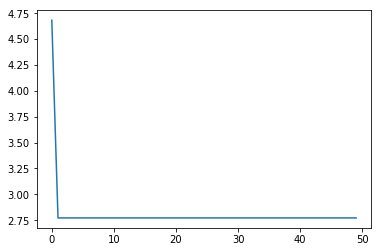

In [0]:
plt.plot(history.history['loss'])

In [0]:
model.evaluate(X_test, Y_test)

2000/2000 [==============================] - 0s 161us/step


[2.7725887298583984, 0.066]

In [0]:
results=model.predict(X_test)

In [0]:
# plt.scatter(range(2000),results,c='r')
# plt.scatter(range(2000),Y_test,c='g')
# plt.show()


In [0]:
score=model.evaluate(X_test, Y_test)
print("test loss: ",score[0])
print("accuracy: ",score[1]*100)

2000/2000 [==============================] - 0s 91us/step
test loss:  2.7725887298583984
accuracy:  6.6000000000000005


In [0]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))

7998
7998
2000
2000


In [0]:
model.evaluate(X_train, Y_train)

7998/7998 [==============================] - 1s 101us/step


[2.7725887289641054, 0.06476619156651808]